In [1]:
import os 
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.stats import gaussian_kde
import networkx as nx

import seaborn as sns
import jenkspy

In [2]:
data_dir = "../data"

In [3]:
region = gpd.read_file("../data/region-2014/MP14_REGION_WEB_PL.shp")
parea = gpd.read_file("../data/planning-area-2014/MP14_PLNG_AREA_WEB_PL.shp")

In [4]:
subzone_fp = os.path.join(data_dir, "subzone-2014", "MP14_SUBZONE_WEB_PL.shp")
subzone = gpd.read_file(subzone_fp)
subzone.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,2014-12-05,31595.8357,29220.1873,5267.381024,1.630379e+06,"POLYGON ((31495.560 30140.012, 31980.957 29671..."
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,2014-12-05,28679.0634,29782.0519,3506.107376,5.598162e+05,"POLYGON ((29092.275 30021.888, 29119.641 30006..."
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,2014-12-05,29654.9594,29974.6553,1740.925766,1.608075e+05,"POLYGON ((29932.332 29879.120, 29947.317 29858..."
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,2014-12-05,26782.8261,29933.7651,3313.624904,5.954289e+05,"POLYGON ((27131.276 30059.727, 27088.334 29709..."
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05,"POLYGON ((26451.027 30396.458, 26440.474 30361..."


In [5]:
com_res = pd.read_csv("mapequation_com_entropy.csv", index_col=0)
com_res.head()

,node,level_1_weekday,level_1_weekend,weekday_com_ent_in,weekday_com_ent_out,weekend_com_ent_in,weekend_com_ent_out
ind,,,,,,,
0,TAMPINES EAST,1,2,0.353991,0.311314,0.294636,0.294559
1,BEDOK NORTH,1,2,0.229097,0.178567,0.346991,0.281375
2,TOA PAYOH CENTRAL,1,2,0.503925,0.463503,0.519752,0.497265
3,ALJUNIED,1,1,0.401774,0.432890,0.293779,0.342999
4,TAMPINES WEST,1,2,0.249632,0.302093,0.199284,0.215336


In [6]:
ks_res = pd.read_csv("k_shell_decomposition_result_entropy.csv", index_col=0)
ks_res.head()

,node,weekday_in_core,weekday_out_core,weekend_in_core,weekend_out_core,weekday_in_core_lvl,weekday_out_core_lvl,weekend_in_core_lvl,weekend_out_core_lvl,weekday_ksc_ent_in,weekday_ksc_ent_out,weekend_ksc_ent_in,weekend_ksc_ent_out
ind,,,,,,,,,,,,,
0,ADMIRALTY,8845,8436,5350,5185,0,0,0,0,0.997714,0.771458,0.999947,0.779104
1,AIRPORT ROAD,2153,2070,515,500,0,0,0,0,0.665975,0.100550,0.683295,0.324450
2,ALEXANDRA HILL,14278,14023,8195,8136,1,1,1,1,0.679349,0.530146,0.883398,0.521277
3,ALEXANDRA NORTH,5717,6379,2838,2951,0,0,0,0,0.986702,0.551673,0.927997,0.682645
4,ALJUNIED,14278,14023,8195,8377,1,1,1,1,0.524651,0.625371,0.437139,0.536421


In [9]:
stat_res = pd.read_csv("node_density_stat_normalized.csv", index_col=0)
stat_res.head()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
node,,,,,,,,,,
ADMIRALTY,0.085027,0.064088,0.095081,0.008601,0.008298,0.102220,0.077090,0.106444,0.018868,0.020532
AIRPORT ROAD,0.011361,0.011493,0.009982,0.004666,0.003565,0.000480,0.001954,0.000290,0.000752,0.000519
ALEXANDRA HILL,0.228828,0.186487,0.251906,0.004467,0.006607,0.220776,0.165543,0.252229,0.009051,0.014105
ALEXANDRA NORTH,0.016157,0.026450,0.016741,0.000569,0.000313,0.010959,0.015612,0.011660,0.000763,0.000551
ALJUNIED,0.585613,0.536596,0.530093,0.123671,0.172411,0.678239,0.641214,0.620737,0.200231,0.289960


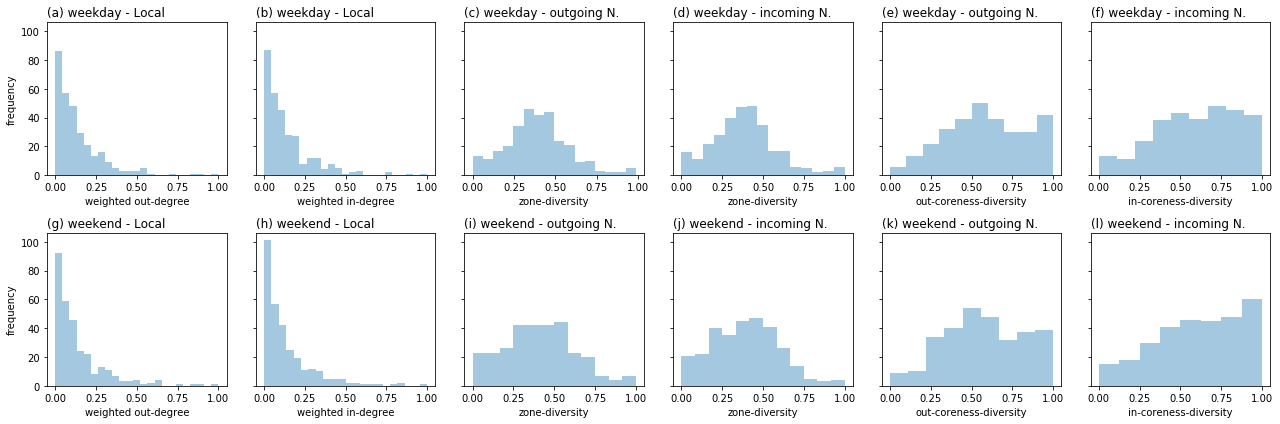

In [27]:
fig, axg = plt.subplots(2, 6, figsize=(18,6), sharey=True)
axs = axg.flatten()

columns = ["out_degree_weekday", "in_degree_weekday", "weekday_com_ent_out", "weekday_com_ent_in", "weekday_ksc_ent_out", "weekday_ksc_ent_in", 
           "out_degree_weekend", "in_degree_weekend", "weekend_com_ent_out", "weekend_com_ent_in", "weekend_ksc_ent_out", "weekend_ksc_ent_in"]
dfs = [stat_res, stat_res, com_res, com_res, ks_res, ks_res] + [stat_res, stat_res, com_res, com_res, ks_res, ks_res]

for i in range(len(columns)):
    df = dfs[i]
    col = columns[i]
    ax = axs[i]
    sns.distplot(df[col], ax=ax, kde=False)

labs = "abcdefghijkl"
labs2 = [ "weekday - Local", "weekday - Local", "weekday - outgoing N.", "weekday - incoming N.", "weekday - outgoing N.", "weekday - incoming N.",
          "weekend - Local", "weekend - Local", "weekend - outgoing N.", "weekend - incoming N.", "weekend - outgoing N.", "weekend - incoming N." ]
xlabs = ["weighted out-degree", "weighted in-degree", "zone-diversity", "zone-diversity", "out-coreness-diversity", "in-coreness-diversity", 
         "weighted out-degree", "weighted in-degree", "zone-diversity", "zone-diversity", "out-coreness-diversity", "in-coreness-diversity"]

for i in range(12):
    ax = axs[i]
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left")
    ax.set_xlabel(xlabs[i])
    
axg[0][0].set_ylabel("frequency")
axg[1][0].set_ylabel("frequency")

plt.tight_layout()


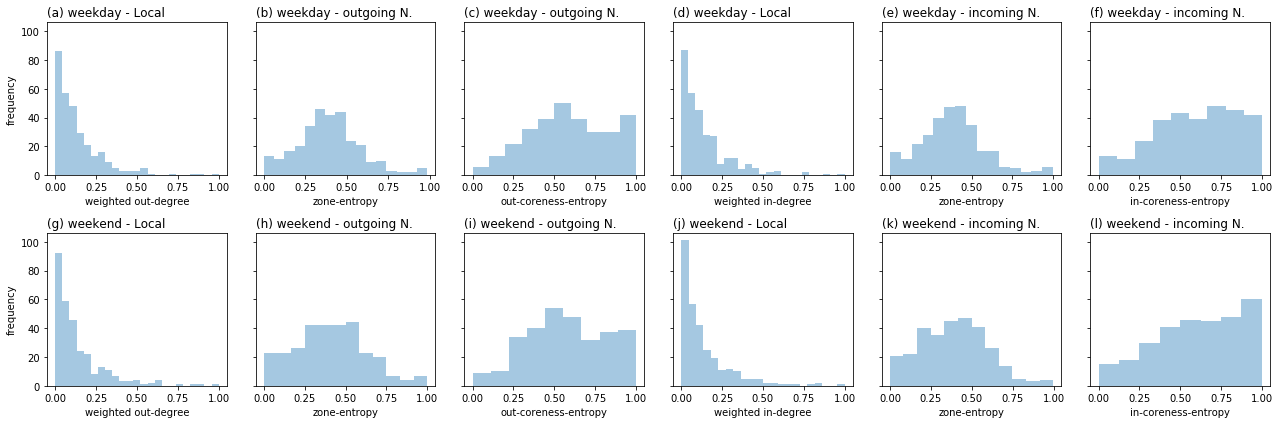

In [32]:
fig, axg = plt.subplots(2, 6, figsize=(18,6), sharey=True)
axs = axg.flatten()

columns = ["out_degree_weekday", "weekday_com_ent_out", "weekday_ksc_ent_out", 
           "in_degree_weekday", "weekday_com_ent_in", "weekday_ksc_ent_in", 
           "out_degree_weekend", "weekend_com_ent_out", "weekend_ksc_ent_out", 
           "in_degree_weekend", "weekend_com_ent_in", "weekend_ksc_ent_in"]

dfs = [stat_res, com_res, ks_res, stat_res, com_res, ks_res] + [stat_res, com_res, ks_res, stat_res, com_res, ks_res]

for i in range(len(columns)):
    df = dfs[i]
    col = columns[i]
    ax = axs[i]
    sns.distplot(df[col], ax=ax, kde=False)

labs = "abcdefghijkl"
labs2 = [ "weekday - Local", "weekday - outgoing N.", "weekday - outgoing N.", 
          "weekday - Local", "weekday - incoming N.", "weekday - incoming N.",
          "weekend - Local", "weekend - outgoing N.", "weekend - outgoing N.", 
          "weekend - Local", "weekend - incoming N.", "weekend - incoming N." ]
xlabs = ["weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy" , 
         "weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy"  ]

for i in range(12):
    ax = axs[i]
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left")
    ax.set_xlabel(xlabs[i])

for i in range(2):
    axg[i][0].set_ylabel("frequency")
    
plt.tight_layout()
#plt.savefig("density_and_diversity.png", dpi=100, bbox_inches="tight")

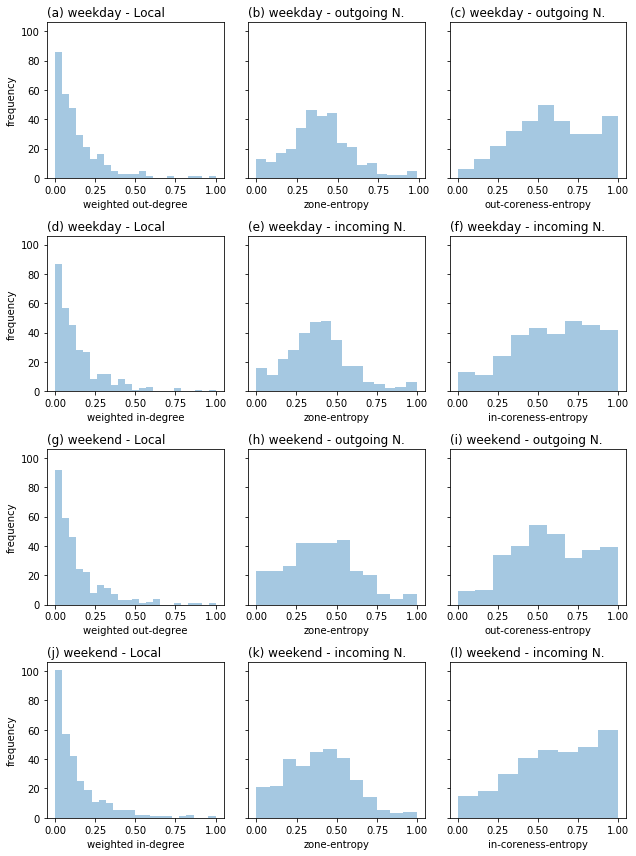

In [33]:
fig, axg = plt.subplots(4, 3, figsize=(9,12), sharey=True)
axs = axg.flatten()

columns = ["out_degree_weekday", "weekday_com_ent_out", "weekday_ksc_ent_out", 
           "in_degree_weekday", "weekday_com_ent_in", "weekday_ksc_ent_in", 
           "out_degree_weekend", "weekend_com_ent_out", "weekend_ksc_ent_out", 
           "in_degree_weekend", "weekend_com_ent_in", "weekend_ksc_ent_in"]

dfs = [stat_res, com_res, ks_res, stat_res, com_res, ks_res] + [stat_res, com_res, ks_res, stat_res, com_res, ks_res]

for i in range(len(columns)):
    df = dfs[i]
    col = columns[i]
    ax = axs[i]
    sns.distplot(df[col], ax=ax, kde=False)

labs = "abcdefghijkl"
labs2 = [ "weekday - Local", "weekday - outgoing N.", "weekday - outgoing N.", 
          "weekday - Local", "weekday - incoming N.", "weekday - incoming N.",
          "weekend - Local", "weekend - outgoing N.", "weekend - outgoing N.", 
          "weekend - Local", "weekend - incoming N.", "weekend - incoming N." ]
xlabs = ["weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy" , 
         "weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy"  ]

for i in range(12):
    ax = axs[i]
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left")
    ax.set_xlabel(xlabs[i])

for i in range(4):
    axg[i][0].set_ylabel("frequency")
    
plt.tight_layout()
plt.savefig("figs/density_and_diversity.png", dpi=100, bbox_inches="tight")

In [7]:
subzone2 = subzone.merge(com_res, left_on="SUBZONE_N", right_on="node")
len(subzone2)

303

In [8]:
subzone3 = subzone.merge(ks_res, left_on="SUBZONE_N", right_on="node")
len(subzone3)

303

In [14]:
merge = pd.merge(com_res, ks_res, left_on="node", right_on="node")
merge.head()

,node,level_1_weekday,level_1_weekend,weekday_com_ent_in,weekday_com_ent_out,weekend_com_ent_in,weekend_com_ent_out,weekday_in_core,weekday_out_core,weekend_in_core,weekend_out_core,weekday_in_core_lvl,weekday_out_core_lvl,weekend_in_core_lvl,weekend_out_core_lvl,weekday_ksc_ent_in,weekday_ksc_ent_out,weekend_ksc_ent_in,weekend_ksc_ent_out
0,TAMPINES EAST,1,2,0.353991,0.311314,0.294636,0.294559,14278,14023,8195,8377,1,1,1,1,0.739688,0.602029,0.742309,0.577384
1,BEDOK NORTH,1,2,0.229097,0.178567,0.346991,0.281375,14278,14023,8195,8377,1,1,1,1,0.278536,0.362557,0.303022,0.385173
2,TOA PAYOH CENTRAL,1,2,0.503925,0.463503,0.519752,0.497265,14278,14023,8195,8377,1,1,1,1,0.862226,0.891770,0.927147,0.953020
3,ALJUNIED,1,1,0.401774,0.432890,0.293779,0.342999,14278,14023,8195,8377,1,1,1,1,0.524651,0.625371,0.437139,0.536421
4,TAMPINES WEST,1,2,0.249632,0.302093,0.199284,0.215336,14278,14023,8195,8377,1,1,1,1,0.246644,0.407002,0.239497,0.342111


In [15]:
merge.columns

Index(['node', 'level_1_weekday', 'level_1_weekend', 'weekday_com_ent_in',
       'weekday_com_ent_out', 'weekend_com_ent_in', 'weekend_com_ent_out',
       'weekday_in_core', 'weekday_out_core', 'weekend_in_core',
       'weekend_out_core', 'weekday_in_core_lvl', 'weekday_out_core_lvl',
       'weekend_in_core_lvl', 'weekend_out_core_lvl', 'weekday_ksc_ent_in',
       'weekday_ksc_ent_out', 'weekend_ksc_ent_in', 'weekend_ksc_ent_out'],
      dtype='object')

In [17]:
xcols = ['weekday_com_ent_in', 'weekday_com_ent_out', 'weekend_com_ent_in', 'weekend_com_ent_out']
ycols = ['weekday_ksc_ent_in', 'weekday_ksc_ent_out', 'weekend_ksc_ent_in', 'weekend_ksc_ent_out']

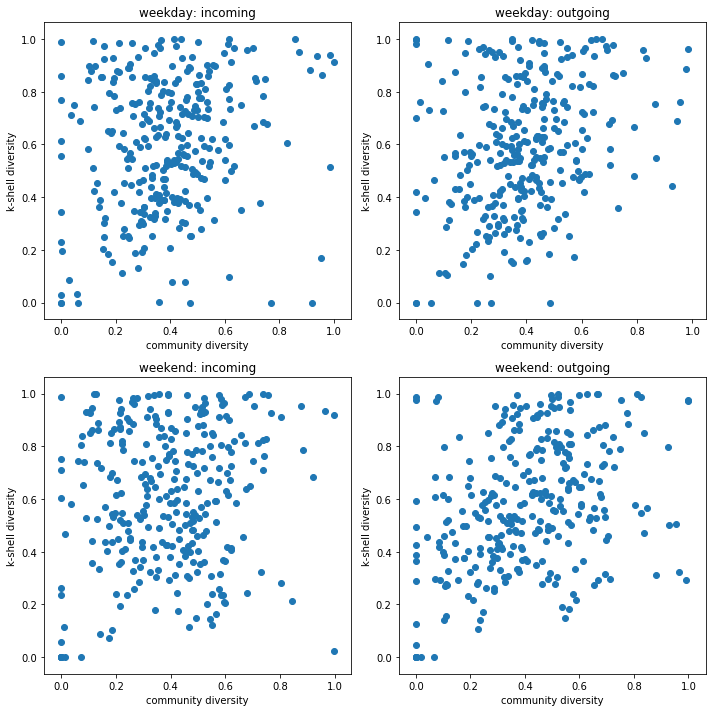

In [19]:
fig, axg = plt.subplots(2,2, figsize=(10,10))
axs = axg.flatten()

labs = "abcd"
labs2 = ["incoming", "outgoing", "incoming", "outgoing"]
for i in range(4):
    ax = axs[i]
    xc = xcols[i]
    yc = ycols[i]
    ax.scatter( merge[xc], merge[yc] )
    ax.set_title("{}: {}".format(xc[:7], labs2[i]))
    ax.set_xlabel("community diversity")
    ax.set_ylabel("k-shell diversity")

plt.tight_layout()

In [11]:
breaks = jenkspy.jenks_breaks(subzone2["weekday_com_ent_in"], nb_class=6)
breaks = [ round(v,4) for v in breaks ]
breaks#[:-1]

[0.0, 0.123, 0.275, 0.4079, 0.5628, 0.7701, 0.9998]